In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from sympy import oo
import sympy
import numpy as np 
from operators.aw_hermite.aw_hermite_operators import aw_psi_hermite

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Enable LaTeX rendering
matplotlib.rcParams['text.usetex'] = True

In [4]:
v= sympy.Symbol('v', real=True)
alpha= sympy.Symbol('alpha', real=True, positive=True)
b= sympy.Symbol('b', real=True)
a= sympy.Symbol('a', real=True)

\begin{equation}
f(v, t=0) =\frac{a + b v^2}{\alpha \sqrt{\pi}} \exp\left(-\frac{v^2}{\alpha^2}\right)
\end{equation}


\begin{align*}
    \psi_{0}(v; \alpha, u=0) &\coloneqq \frac{1}{\sqrt{\pi}}  \exp\left(- \frac{v^2}{\alpha^2}\right)\\
    \psi_{1}(v; \alpha, u=0) &\coloneqq  \frac{\sqrt{2}v}{\sqrt{\pi} \alpha^2 } \exp\left(- \frac{v^2}{\alpha^2}\right)\\
    \psi_{2}(v; \alpha, u=0) &\coloneqq  \frac{1}{\sqrt{2\pi}} \left[\frac{v^2}{\alpha^2} -1\right] \exp\left(- \frac{v^2}{\alpha^2}\right)
\end{align*}


In [5]:
f0 = sympy.Lambda((v, a, b, alpha), (a+b*(v**2)) /alpha / sympy.sqrt(sympy.pi) * sympy.exp(-v**2/alpha**2))


In [6]:
f0(v, a, b, alpha)

(a + b*v**2)*exp(-v**2/alpha**2)/(sqrt(pi)*alpha)

In [7]:
psi_0 = sympy.Lambda((v, alpha), 1/sympy.sqrt(sympy.pi * (2**0) * sympy.factorial(0)) * sympy.hermite(0, v/alpha)* sympy.exp(-v**2/alpha**2))
psi_1 = sympy.Lambda((v, alpha), 1/sympy.sqrt(sympy.pi * (2**1) * sympy.factorial(1)) * sympy.hermite(1, v/alpha)* sympy.exp(-v**2/alpha**2))
psi_2 = sympy.Lambda((v, alpha), 1/sympy.sqrt(sympy.pi* (2**2) * sympy.factorial(2)) * sympy.hermite(2, v/alpha)* sympy.exp(-v**2/alpha**2))

In [8]:
psi_dual_0 = sympy.Lambda((v, alpha), 1/sympy.sqrt((2**0) * sympy.factorial(0)) * sympy.hermite(0, v/alpha))
psi_dual_1 = sympy.Lambda((v, alpha), 1/sympy.sqrt((2**1) * sympy.factorial(1)) * sympy.hermite(1, v/alpha))
psi_dual_2 = sympy.Lambda((v, alpha), 1/sympy.sqrt((2**2) * sympy.factorial(2)) * sympy.hermite(2, v/alpha))

In [9]:
sympy.simplify(psi_0(v, alpha))

exp(-v**2/alpha**2)/sqrt(pi)

In [10]:
sympy.simplify(psi_1(v, alpha))

sqrt(2)*v*exp(-v**2/alpha**2)/(sqrt(pi)*alpha)

In [11]:
sympy.simplify(psi_2(v, alpha))

sqrt(2)*(-alpha**2/2 + v**2)*exp(-v**2/alpha**2)/(sqrt(pi)*alpha**2)

In [12]:
# b_opt = sympy.Lambda((alpha, a), sympy.solve(sympy.Eq(sympy.integrate(f0(v, a, b, alpha), (v,-oo,oo)), 1), b)[0])

In [13]:
# the integral needs to be 1 
# b_opt

In [14]:
C0 = sympy.Lambda((alpha, a, b), sympy.integrate(f0(v, a, b, alpha)*psi_dual_0(v, alpha)/alpha, (v,-oo,oo)))

In [15]:
C0

Lambda((alpha, a, b), a/alpha + alpha*b/2)

In [16]:
# charge neutrality enforcement!
a_opt = sympy.solve(sympy.Eq(sympy.simplify(C0(alpha, a, b)), 1/alpha), a)[0]

In [17]:
a_opt

-alpha**2*b/2 + 1

In [18]:
C2 = sympy.Lambda((alpha, a, b), sympy.integrate(f0(v, a, b, alpha)*psi_dual_2(v, alpha)/alpha, (v,-oo,oo)))

In [19]:
sympy.simplify(C2)

Lambda((alpha, a, b), sqrt(2)*alpha*b/2)

In [20]:
sympy.simplify(C0(alpha, a_opt, b))

1/alpha

In [21]:
sympy.simplify(C2(alpha, a_opt, b))

sqrt(2)*alpha*b/2

In [42]:
v_ = np.linspace(-5, 5, 1000)

In [43]:
def f_0(v_, a_, b_, alpha_):
    return (a_+b_*(v_**2)) /alpha_ / np.sqrt(np.pi) * np.exp(-v_**2/alpha_**2)

In [44]:
def a_opt(alpha_, b_):
    return 1 - alpha_**2 * b_ / 2

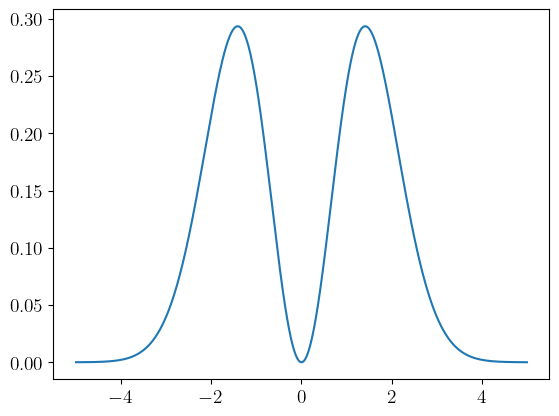

In [45]:
fig, ax = plt.subplots()

alpha_ = np.sqrt(2)
b_ =  2/ alpha_**2 

ax.plot(v_, f_0(v_=v_, a_=a_opt(alpha_, b_), b_=b_, alpha_=alpha_))

In [46]:
distribution = np.zeros(len(v_))
for jj in range(5):
    if jj==0:
        C = 1/alpha_
    elif jj==2:
        C = alpha_*b_ / np.sqrt(2)
    else:
        C=0
    distribution += C * aw_psi_hermite(v=v_, u_s=0, alpha_s=alpha_, n=jj)

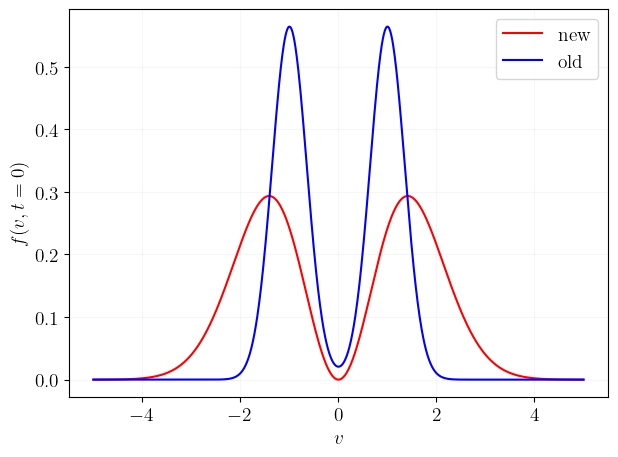

In [51]:
fig, ax = plt.subplots()

ax.plot(v_, distribution, color="red", label="new")
ax.plot(v_, 0.5 * np.exp(-((v_-1)**2)*4)/np.sqrt(np.pi)*2 + 0.5 * np.exp(-((v_+1)**2)*4)/np.sqrt(np.pi)*2, color="blue", label="old")
ax.set_xlabel("$v$")
ax.set_ylabel("$f(v, t=0)$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()